# Make table stats

In [17]:
import numpy as np
from astropy.table import Table
from matplotlib import pyplot as plt

In [111]:
import matplotlib.backends.backend_pdf


In [1]:
blindtable = 'blindtest.csv'  # spectro_Backgroundruns.csv
semiblindtable = 'summarytest.csv'  # psdlc_Backgroundruns.csv

In [221]:
idstr = 'spectro_Backgroundruns'
ocstd = 'final_oc_std'
vals = ['w', 'stdgran2', 'nugran2', 'hosc', 'stdenv', 'numax']

idstr = 'psdlc_Backgroundruns'

idstr = 'psdlc_Backgroundruns_lc'
ocstd = 'oc_std_lc'
vals = ['w_lc', 'stdgran2_lc', 'nugran2_lc', 'hosc_lc', 'stdenv_lc', 'numax_lc']

idstr = 'psdlc_Backgroundruns_psd'
ocstd = 'oc_std_psd'
vals = ['w_psd', 'stdgran2_psd', 'nugran2_psd', 'hosc_psd', 'stdenv_psd', 'numax_psd']


In [194]:
summarytable = Table.read(idstr + '.csv', format='ascii.tab')

In [195]:
fillvalue = -999

In [199]:
np.sum(summarytable['numax_psd'] != fillvalue), len(summarytable)

(1628, 3141)

In [206]:
summarytable.columns

<TableColumns names=('star','initialnumax_lc','w_lc','upper_credlimit_w_lc','lower_credlimit_w_lc','error_w_lc','stdgran2_lc','upper_credlimit_stdgran2_lc','lower_credlimit_stdgran2_lc','error_stdgran2_lc','nugran2_lc','upper_credlimit_nugran2_lc','lower_credlimit_nugran2_lc','error_nugran2_lc','hosc_lc','upper_credlimit_hosc_lc','lower_credlimit_hosc_lc','error_hosc_lc','numax_lc','upper_credlimit_numax_lc','lower_credlimit_numax_lc','error_numax_lc','stdenv_lc','upper_credlimit_stdenv_lc','lower_credlimit_stdenv_lc','error_stdenv_lc','oc_std_lc','initialnumax_psd','w_psd','upper_credlimit_w_psd','lower_credlimit_w_psd','error_w_psd','stdgran2_psd','upper_credlimit_stdgran2_psd','lower_credlimit_stdgran2_psd','error_stdgran2_psd','nugran2_psd','upper_credlimit_nugran2_psd','lower_credlimit_nugran2_psd','error_nugran2_psd','hosc_psd','upper_credlimit_hosc_psd','lower_credlimit_hosc_psd','error_hosc_psd','numax_psd','upper_credlimit_numax_psd','lower_credlimit_numax_psd','error_numax_ps

In [220]:
idstr

'psdlc_Backgroundruns_lc'

In [222]:
with open(idstr + '_info.txt', "w") as fp:
    summarytable.info('stats', out=fp)

In [207]:
plot_labels = [
    r'W [ppm$^2$/$\mu$Hz]',
    r'$\sigma_{color}$ [ppm]',
    r'$\nu_{color}$ [$\mu$Hz]',
    r'$\sigma_{long}$ [ppm]',
    r'$\nu_{long}$ [$\mu$Hz]',
    r'$\sigma_{gran,1}$ [ppm]',
    r'$\nu_{gran,1}$ [$\mu$Hz]',
    r'$\sigma_{gran,2}$ [ppm]',
    r'$\nu_{gran,2}$ [$\mu$Hz]',
    r'$\sigma_{gran}^{org}$ [ppm]',
    r'$\nu_{gran}^{org}$ [$\mu$Hz]',
    r'H$_{osc}$ [ppm$^2$/$\mu$Hz]',
    r'$\nu_{max}$ [$\mu$Hz]',
    r'$\sigma_{env}$ [$\mu$Hz]'
]
vallabels = {
    'w': plot_labels[0],
    'stdgran2': plot_labels[9],
    'nugran2': plot_labels[10],
    'hosc': plot_labels[11],
    'stdenv': plot_labels[13],
    'numax': plot_labels[12],
    
    'w_lc': plot_labels[0] + ' LC',
    'stdgran2_lc': plot_labels[9]+ ' LC',
    'nugran2_lc': plot_labels[10]+ ' LC',
    'hosc_lc': plot_labels[11]+ ' LC',
    'stdenv_lc': plot_labels[13]+ ' LC',
    'numax_lc': plot_labels[12]+ ' LC',
    'w_psd': plot_labels[0]+ ' PSD',
    'stdgran2_psd': plot_labels[9]+ ' PSD',
    'nugran2_psd': plot_labels[10]+ ' PSD',
    'hosc_psd': plot_labels[11]+ ' PSD',
    'stdenv_psd': plot_labels[13]+ ' PSD',
    'numax_psd': plot_labels[12]+ ' PSD',
}             

In [208]:
def colorbar(mappable):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    return cbar

In [212]:
def make_fracplot(fig, val, err, vallabel, errlabel,
                  mask=None,
                  cc=None, cclabel='oc_std', fraclines=False):
    h = 4.8
    l = 6.4
    plt.xlabel(vallabel)
    plt.ylabel(errlabel)
    if mask is None:
        mask = ~val.mask
    mask &= (val != fillvalue)
    if cc is not None:
        scatters = plt.scatter(val[mask], err[mask], c=cc[mask], s=2)
        colorbar(scatters)
    else:
        plt.scatter(val[mask], err[mask], s=2)
    xs = np.linspace(np.amin(val[mask]), np.amax(val[mask]), 10)

    if fraclines:
        offset = 0.2 * np.std(val[mask])
        plt.plot(xs, xs, '--')
        plt.text(xs[8]-offset, xs[8], '100%', rotation=l/h * 25)
        plt.plot(xs, 0.5 * xs, '--')
        plt.text(xs[8]-offset, 0.5* xs[8], '50%', rotation=0.5 * l/h * 25)

        
def make_distplot(fig, val, vallabel, mask=None):
    if mask is None:
        mask = ~val.mask
    mask &= (val != fillvalue)
    plt.xlabel(vallabel)
    plt.hist(val[mask], bins=100)

38


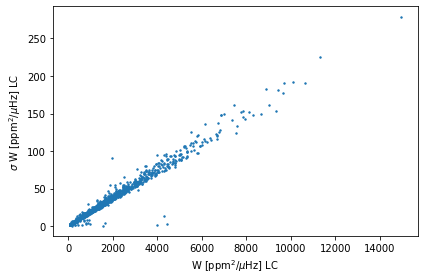

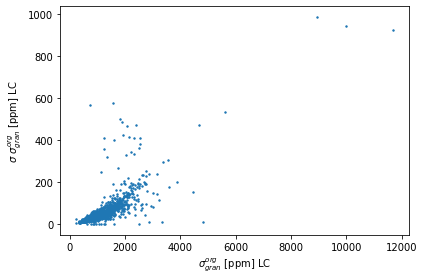

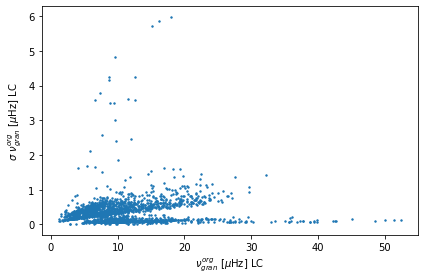

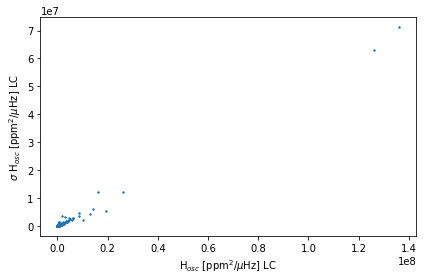

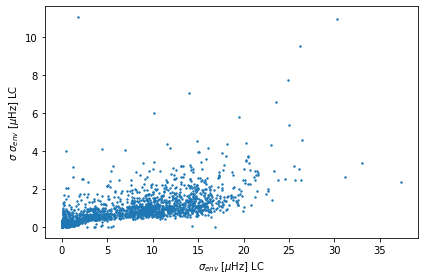

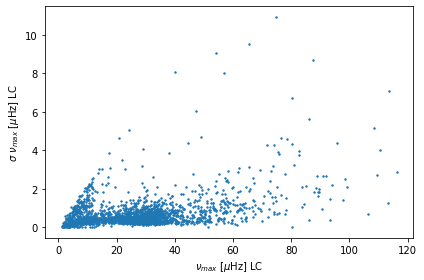

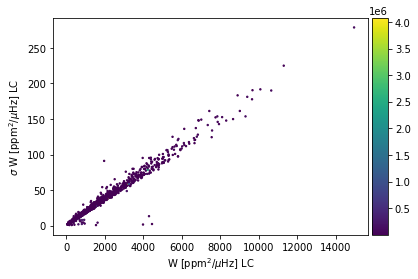

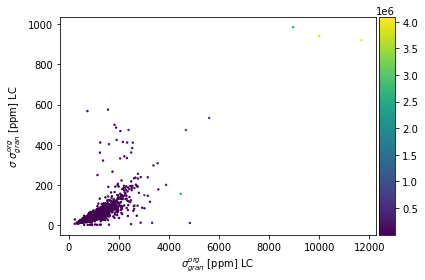

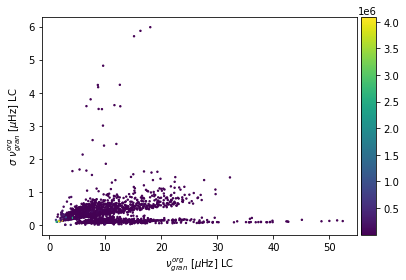

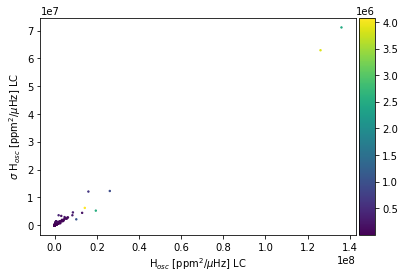

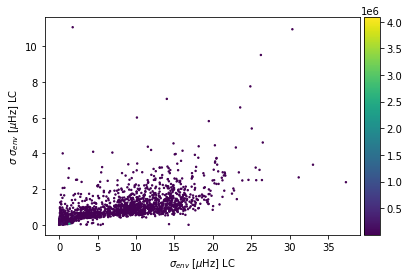

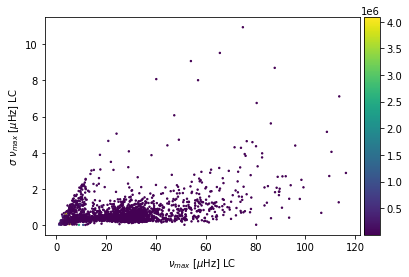

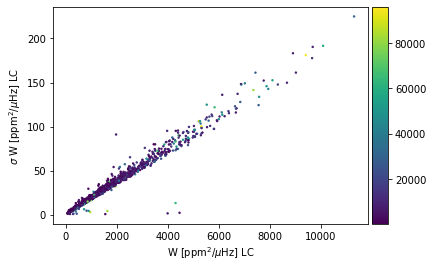

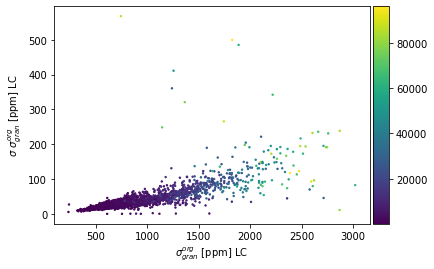

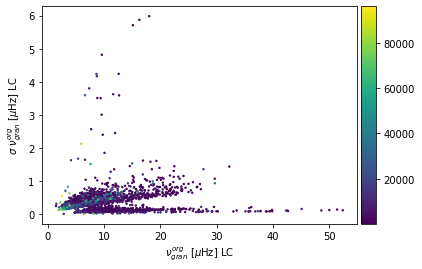

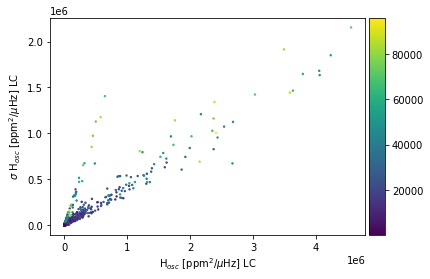

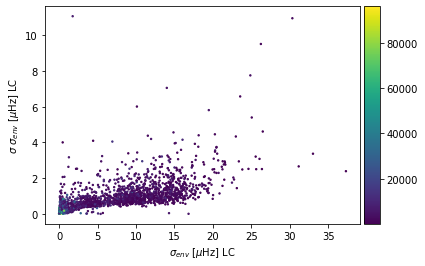

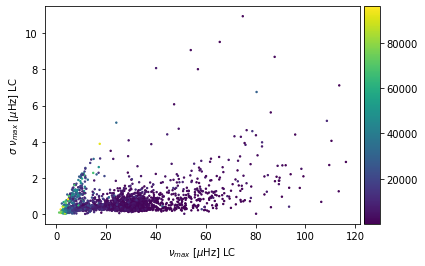

In [216]:

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_all.pdf')
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val], 
                  '$\sigma$ ' + vallabels[val])
    plt.tight_layout()
    pdf.savefig(fig)
pdf.close()

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_cc.pdf')
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val],
                  '$\sigma$ ' + vallabels[val],
                  cc=summarytable[ocstd])
    pdf.savefig(fig)
pdf.close()

pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_ccmask.pdf')
mask = (summarytable[ocstd] < 1e5)
print(np.sum(~mask))
for val in vals:
    fig = plt.figure()
    make_fracplot(fig,
                  summarytable[val],
                  summarytable['error_' + val],
                  vallabels[val],
                  '$\sigma$ ' + vallabels[val],
                  cc=summarytable[ocstd],
                  mask=mask)
    pdf.savefig(fig)
pdf.close()

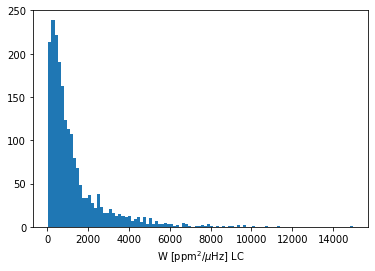

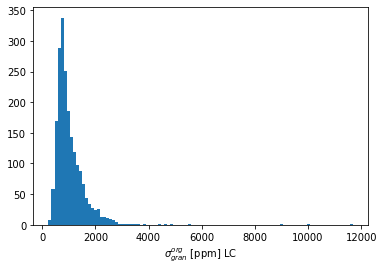

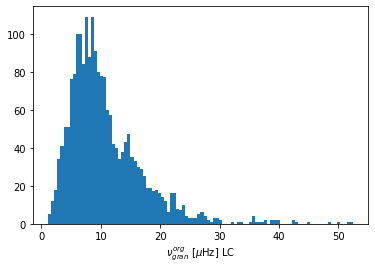

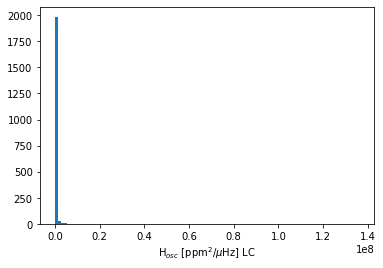

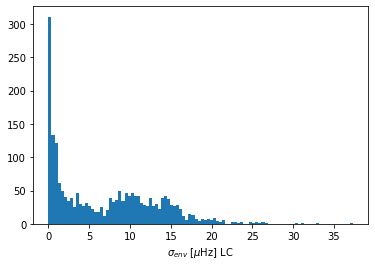

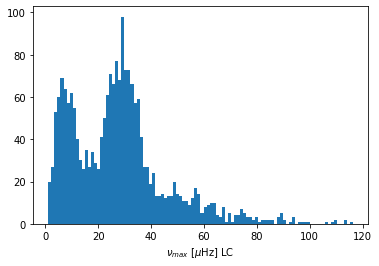

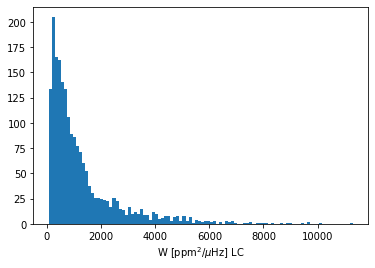

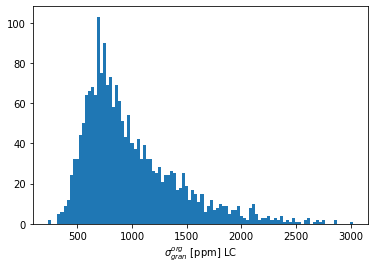

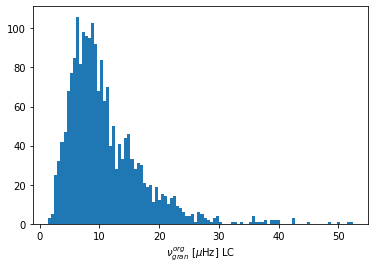

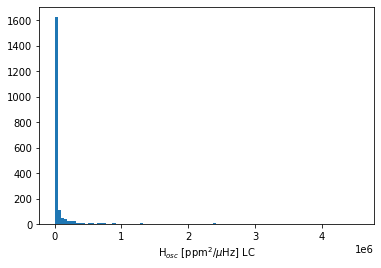

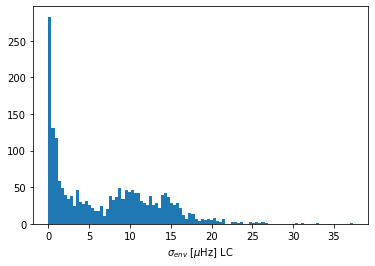

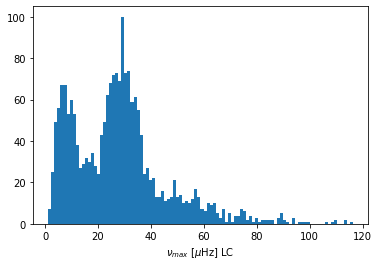

In [217]:
# Distibutions
pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_dists.pdf')
for val in vals:
    fig = plt.figure()
    make_distplot(fig,
                  summarytable[val],
                  vallabels[val])
    pdf.savefig(fig)
pdf.close()

# Distibutions
pdf = matplotlib.backends.backend_pdf.PdfPages(idstr + '_distsmask.pdf')
mask = (summarytable[ocstd] < 1e5)
for val in vals:
    fig = plt.figure()
    make_distplot(fig,
                  summarytable[val],
                  vallabels[val], mask=mask)
    pdf.savefig(fig)
pdf.close()